 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#第6章:-英語テキストの処理" data-toc-modified-id="第6章:-英語テキストの処理-1">第6章: 英語テキストの処理</a></span><ul class="toc-item"><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#50.-文区切り" data-toc-modified-id="50.-文区切り-1.0.1">50. 文区切り</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#51.-単語の切り出し" data-toc-modified-id="51.-単語の切り出し-1.0.2">51. 単語の切り出し</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#52.-ステミング" data-toc-modified-id="52.-ステミング-1.0.3">52. ステミング</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#53.-Tokenization" data-toc-modified-id="53.-Tokenization-1.0.4">53. Tokenization</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#54.-品詞タグ付け" data-toc-modified-id="54.-品詞タグ付け-1.0.5">54. 品詞タグ付け</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#55.-固有表現抽出" data-toc-modified-id="55.-固有表現抽出-1.0.6">55. 固有表現抽出</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#56.-共参照解析" data-toc-modified-id="56.-共参照解析-1.0.7">56. 共参照解析</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#57.-係り受け解析" data-toc-modified-id="57.-係り受け解析-1.0.8">57. 係り受け解析</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#58.-タプルの抽出" data-toc-modified-id="58.-タプルの抽出-1.0.9">58. タプルの抽出</a></span></li><li><span><a href="http://localhost:8888/notebooks/t-tagami/Chapter_6/Chapter_6.ipynb#59.-S式の解析" data-toc-modified-id="59.-S式の解析-1.0.10">59. S式の解析</a></span></li></ul></ul></li></ul></div>

# 第6章: 英語テキストの処理
英語のテキスト（nlp.txt）に対して，以下の処理を実行せよ．

In [9]:
!wget http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt -P data

--2017-07-18 15:04:57--  http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt
Resolving www.cl.ecei.tohoku.ac.jp... 130.34.192.83
Connecting to www.cl.ecei.tohoku.ac.jp|130.34.192.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8594 (8.4K) [text/plain]
Saving to: ‘data/nlp.txt’

nlp.txt             100%[===================>]   8.39K  --.-KB/s    in 0.03s   

2017-07-18 15:04:57 (257 KB/s) - ‘data/nlp.txt’ saved [8594/8594]



In [20]:
!head data/nlp.txt
!cat data/nlp.txt | wc -l

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would b

### 50. 文区切り
(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ

In [ ]:
#行毎に読み込む関数 田さんver
def readLine(fn):
    with open () as f:
        while True:
            yield next(filr).rstrip('\n')

In [242]:
%%file src/50.py
import re
with open('data/nlp.txt') as f_r:
    for line in f_r:
        for sentence in re.split(r'(?<=[\.;:?!])\s(?=[A-Z])', line):
            print(sentence.rstrip())

Overwriting src/50.py


In [243]:
!python src/50.py > work/50.txt

In [244]:
!head work/50.txt

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.
As such, NLP is related to the area of humani-computer interaction.
Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods.


### 51. 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [119]:
%%file src/51.py
import sys
for line in sys.stdin:
    for word in line.split(' '):
        print(word.strip(",.:-()\"\n"))
    print()

Overwriting src/51.py


In [120]:
!python src/51.py < work/50.txt > work/51.txt

In [123]:
!head -30 work/51.txt

Natural
language
processing

From
Wikipedia
the
free
encyclopedia



Natural
language
processing
NLP
is
a
field
of
computer
science
artificial
intelligence
and
linguistics
concerned
with
the
interactions


### 52. ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装としてstemmingモジュールを利用するとよい．

In [125]:
!pip install stemming

In [1]:
#田さんはstemmingにnltkを使っている

In [140]:
%%file src/52.py
import sys
from stemming.porter2 import stem
for word in sys.stdin:
    print('{}\t{}'.format(word.rstrip(), stem(word.rstrip())))

Overwriting src/52.py


In [141]:
!python src/52.py < work/51.txt > work/52.txt

In [142]:
!head -20 work/52.txt

Natural	Natur
language	languag
processing	process
	
From	From
Wikipedia	Wikipedia
the	the
free	free
encyclopedia	encyclopedia
	
	
	
Natural	Natur
language	languag
processing	process
NLP	NLP
is	is
a	a
field	field
of	of


### 53. Tokenization
Stanford Core NLPを用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

stanford core nlpはそのままではまずうまくいかない
プロパティファイルをいじくろう(Props.properties)
少し前のcore NLPだと()を処理しようとすると落ちる
javaはプログラムのガベコレが働いている.javaのガベコレは使うメモリ領域をいろんなブロックに分けていて使わなそうなデータを優先度の低いブロックに移す.
* annotators どんな処理をしたいかのリスト
* outputExtesnsion = .xml 出力ファイルの仕様を指定
* tokenize.whitespace = true 
* ssplit.eolonly = true 文末でしか区切らないようにする

In [11]:
!pip install corenlp-python

In [145]:
#ここで2時間ほどロス リファレンス読むのは大事ってはっきりわかんだね
!java -cp "/Users/tagami/Documents/python/stanford-corenlp-full-2017-06-09/*" -Xmx2g edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref -file data/nlp.txt work

[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [2.0 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [2.7 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.muc.7cla

In [233]:
!head -20 work/nlp.txt.xml

In [219]:
%%file src/53.py
#XPathチートシート xpath -> XMLから必要な箇所を探索・抽出する為に用いられる言語
#http://aoproj.web.fc2.com/xpath/XPath_cheatsheets_v2.pdf
import sys
from lxml import etree
tree = etree.parse(sys.stdin) #文書全体を読み取ってメモリー内ツリーを作成
for word in tree.xpath('//word'):
    print(word.text)

Overwriting src/53.py


In [220]:
!python src/53.py < work/nlp.txt.xml > work/53.txt

In [221]:
!head -20 work/53.txt

Natural
language
processing
From
Wikipedia
,
the
free
encyclopedia
Natural
language
processing
-LRB-
NLP
-RRB-
is
a
field
of
computer


### 54. 品詞タグ付け
Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [222]:
%%file src/54.py
import sys
from lxml import etree
tree = etree.parse(sys.stdin)
for token in tree.xpath('//token'):
    print('{}\t{}\t{}'.format(token.find('word').text, token.find('lemma').text, token.find('POS').text))

Overwriting src/54.py


In [223]:
!python src/54.py < work/nlp.txt.xml > work/54.txt

In [224]:
!head work/54.txt

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
,	,	,
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ


### 55. 固有表現抽出
入力文中の人名をすべて抜き出せ．

In [237]:
%%file src/55.py
import sys
from lxml import etree
tree = etree.parse(sys.stdin)
for token in tree.xpath('//token'):
    if token.find('NER').text == 'PERSON':
        print(token.find('word').text)

Overwriting src/55.py


In [238]:
!python src/55.py < work/nlp.txt.xml > work/55.txt

In [239]:
!head work/55.txt

Alan
Turing
Joseph
Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell


### 56. 共参照解析
Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

In [227]:
%%file src/56.py
import sys, re
from lxml import etree
tree = etree.parse(sys.stdin)
coreferences = []
for coreference in tree.xpath('//coreference/coreference'):
    rep_sent = coreference.xpath('./mention[@representative="true"]/text')[0].text
    for mention in coreference.xpath('./mention[not(@representative)]'):
        coreferences.append({'sent_idx': int(mention.find('sentence').text),
                                'start_idx': int(mention.find('start').text)-1,
                                'end_idx': int(mention.find('end').text)-1,
                                'core_sent': mention.find('text').text,
                                'rep_sent': rep_sent})

for sent_idx, sentence in enumerate(tree.xpath('//sentences/sentence/tokens'), 1):
    sent = [token.find('word').text for token in sentence]
    replace_list = [[core['start_idx'], core['end_idx'], '｢{}｣({})'.format(core['rep_sent'],core['core_sent'])]
                    for core in coreferences if sent_idx == core['sent_idx']]
    for replace in sorted(replace_list, key=lambda x:x[0], reverse=True):
        del sent[replace[0]:replace[1]]
        sent.insert(replace[0], replace[2])
    print(' '.join(sent))

#35文目のyourとyour headとか24文目を置換する部分は目を瞑ろう

Overwriting src/56.py


In [228]:
!python src/56.py < work/nlp.txt.xml > work/56.txt

In [229]:
!head work/56.txt

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is ｢the free encyclopedia Natural language processing -LRB- NLP -RRB-｣(a field of computer science) , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages .
As such , NLP is related to the area of humani-computer interaction .
Many challenges in NLP involve natural language understanding , that is , enabling ｢computers｣(computers) to derive meaning from human or natural language input , and others involve natural language generation .
History The history of NLP generally starts in the 1950s , although work can be found from earlier periods .
In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the ｢Alan Turing｣(Turing) test as a criterion of intelligence .
The Georgetown experiment in 1954 involved fully automatic translation 

置換されてないとだめリスト

In [201]:
!python src/56_.py < work/nlp.txt.xml

1 [16, 21, '｢the free encyclopedia Natural language processing -LRB- NLP -RRB-｣(a field of computer science)']
3 [13, 14, '｢computers｣(computers)']
5 [22, 23, '｢Alan Turing｣(Turing)']
7 [10, 12, '｢a solved problem｣(machine translation)']
9 [4, 6, '｢a solved problem｣(machine translation)']
10 [12, 26, "｢SHRDLU｣(a natural language system working in restricted `` blocks worlds '' with restricted vocabularies)"]
12 [35, 36, '｢you｣(your)']
12 [35, 37, '｢My head｣(your head)']
12 [25, 26, "｢the `` patient ''｣(My)"]
12 [12, 13, '｢ELIZA｣(ELIZA)']
15 [48, 50, '｢Lehnert｣(Lehnert 1981)']
15 [20, 21, '｢1978｣(1978)']
17 [6, 7, '｢NLP｣(NLP)']
17 [2, 4, '｢the late 1980s｣(the 1980s)']
18 [22, 24, '｢the free encyclopedia Natural language processing -LRB- NLP -RRB-｣(language processing)']
18 [2, 5, '｢the late 1980s｣(the late 1980s)']
19 [49, 51, '｢the free encyclopedia Natural language processing -LRB- NLP -RRB-｣(language processing)']
20 [6, 7, '｢machine learning algorithms for language processing｣(algor

### 57. 係り受け解析
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

テキストが同じ時に同じノードにならないようにインデックスをつける
LRBとRRBを使うのはカッコを区別するため

In [30]:
%%file src/57.py
import sys, re
from lxml import etree
from graphviz import Digraph

def get_dependency_tree(input_num):
    tree = etree.parse(sys.stdin)
    dependencies = tree.xpath('//dependencies[@type="collapsed-dependencies"]')
    for num, dependency in enumerate(dependencies):
        if num == input_num:
            dep_list = [[dep.find('governor').text, dep.find('dependent').text] 
                        for dep in dependency.xpath('.//dep') ]
            G = Digraph(format = 'png')
            G.attr('node', shape='cylinder')
            for dep in dep_list:
                G.edge(dep[0], dep[1])
            G.render('work/tree')

get_dependency_tree(7)

Overwriting src/57.py


In [31]:
!python src/57.py < work/nlp.txt.xml

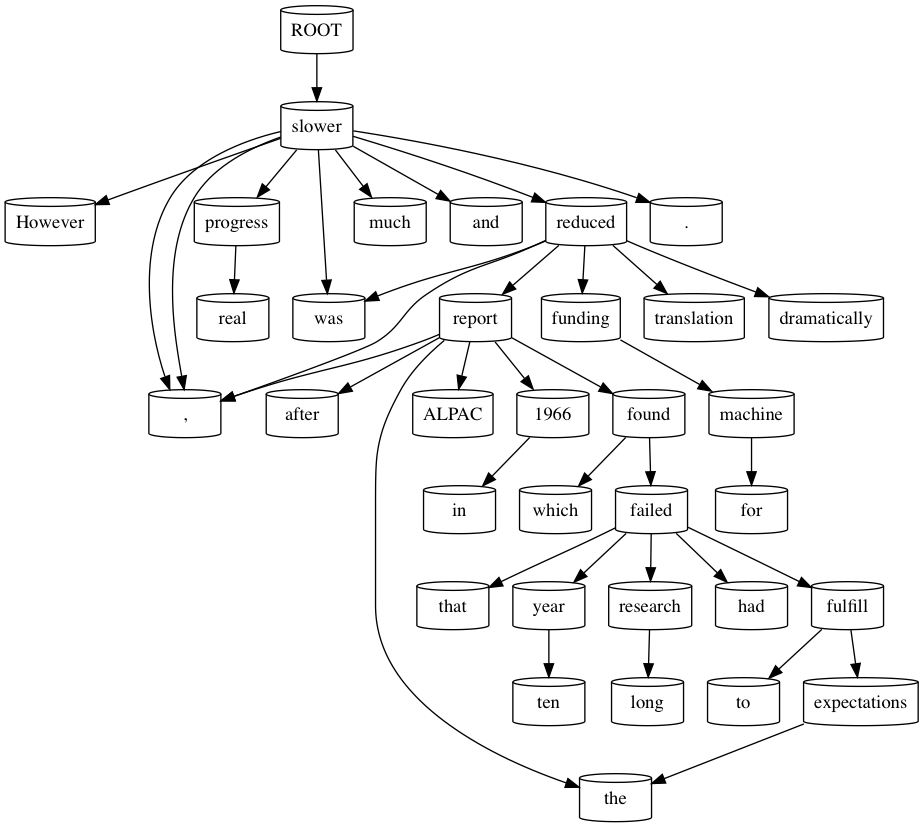

In [32]:
#カオス
from IPython.display import Image, display_png
display_png(Image('work/tree.png'))

### 58. タプルの抽出
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．

述語: nsubj関係とdobj関係の子（dependant）を持つ単語  
主語: 述語からnsubj関係にある子（dependent）  
目的語: 述語からdobj関係にある子（dependent）

In [18]:
%%file src/58.py
import sys, re
from lxml import etree

tree = etree.parse(sys.stdin)
for dependency in tree.xpath('//dependencies[@type="collapsed-dependencies"]'):
    #文中のnsubjを探す
    nsubjs = dependency.xpath("dep[@type='nsubj']") 
    for nsubj in nsubjs:
        governor_idx = nsubj.find('governor').attrib['idx']
        governor_text = nsubj.find('governor').text #述語
        dependent_text = nsubj.find('dependent').text #主語
        #目的語探しの旅
        for dobj in dependency.xpath('dep[@type="dobj"][governor[@idx="{}"]]'.format(governor_idx)):
            print('{}\t{}\t{}'.format(dependent_text, governor_text, dobj.find('dependent').text))

Overwriting src/58.py


In [19]:
!python src/58.py < work/nlp.txt.xml

understanding	enabling	computers
others	involve	generation
Turing	published	article
experiment	involved	translation
ELIZA	provided	interaction
patient	exceeded	base
ELIZA	provide	response
which	structured	information
underpinnings	discouraged	sort
that	underlies	approach
Some	produced	systems
which	make	decisions
systems	rely	which
that	contains	errors
implementations	involved	coding
algorithms	take	set
Some	produced	systems
which	make	decisions
models	have	advantage
they	express	certainty
Systems	have	advantages
Automatic	make	use
that	make	decisions


### 59. S式の解析
Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．

**車輪の再発明はやめよう**  
http://www.nltk.org/_modules/nltk/tree.html  
かっこを読み飛ばしたい時に正規表現だけでやるのは無理  
かっこの数を数える変数が必要

In [33]:
%%file src/59.py
import sys, re
from lxml import etree
from nltk.tree import Tree

tree = etree.parse(sys.stdin)
for parse in tree.xpath('//parse'):
    for subtree in Tree.fromstring(parse.text).subtrees():
            if subtree.label() == 'NP': print(' '.join(subtree.leaves()))

Overwriting src/59.py


In [34]:
!python src/59.py < work/nlp.txt.xml > work/59.txt

In [35]:
!head work/59.txt

Natural language processing
Wikipedia
the free encyclopedia Natural language processing -LRB- NLP -RRB-
the free encyclopedia Natural language processing
NLP
a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
a field of computer science
a field
computer science
artificial intelligence
